In [1]:
# Librerías
 
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy import stats
from scipy import special
import math

El proyecto consta en dejar caer 30 veces un borrador y medir su tiempo de caida con ayuda de un smartphone, se realizan los siguientes pasos


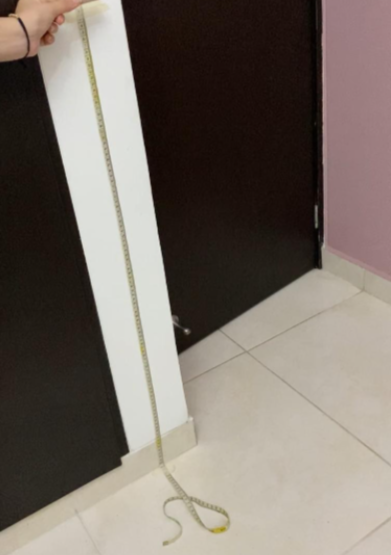


**Paso 1.** Usando la expresión g=2d/t^2 , donde g es la aceleración de la gravedad, d es la distancia desde donde se deja caer un objeto, y t es el tiempo que demora en caer, mida 30 veces el tiempo de caída del objeto desde la misma altura usando un cronómetro. Recuerde que si usa la vista para accionar el cronómetro cuando el objeto llega al piso hay un tiempo de retraso en la respuesta muscular de 0.25 s.

In [2]:
dcaida=np.array([0.63, 0.67, 0.69, 0.65, 0.7,  0.66, 0.65, 0.64, 0.68, 0.6,  0.65, 0.66, 0.66, 0.69, 0.75, 0.7,  0.66, 0.61, 0.75, 0.76, 0.67, 0.68, 0.71, 0.65, 0.72, 0.72, 0.73, 0.7, 0.7,  0.69])
print("el tiempo que se demora en caer un borrador desde una distancia de 1m es:", dcaida)

el tiempo que se demora en caer un borrador desde una distancia de 1m es: [0.63 0.67 0.69 0.65 0.7  0.66 0.65 0.64 0.68 0.6  0.65 0.66 0.66 0.69
 0.75 0.7  0.66 0.61 0.75 0.76 0.67 0.68 0.71 0.65 0.72 0.72 0.73 0.7
 0.7  0.69]


In [3]:
dcaidamuscular= dcaida-0.25
print("el tiempo que se demora en caer un borrador desde una distancia de 1m menos el error muscular es: ", dcaidamuscular)

el tiempo que se demora en caer un borrador desde una distancia de 1m menos el error muscular es:  [0.38 0.42 0.44 0.4  0.45 0.41 0.4  0.39 0.43 0.35 0.4  0.41 0.41 0.44
 0.5  0.45 0.41 0.36 0.5  0.51 0.42 0.43 0.46 0.4  0.47 0.47 0.48 0.45
 0.45 0.44]


In [4]:
y=np.arange(0,0.60,0.02)
len(y)

30

In [5]:
x=np.arange(1,31,1)
len(x)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [6]:
promedio= np.mean(dcaida)
promedio

0.6809999999999999

In [7]:
promediomuscular= np.mean(dcaidamuscular)
promediomuscular

0.431

**Paso 2.** Se determina la media de los tiempos y grafique el residuo respecto a la media y mostrar que estos datos son aleatorios.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


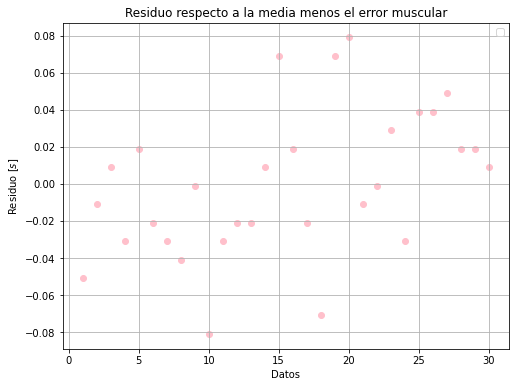

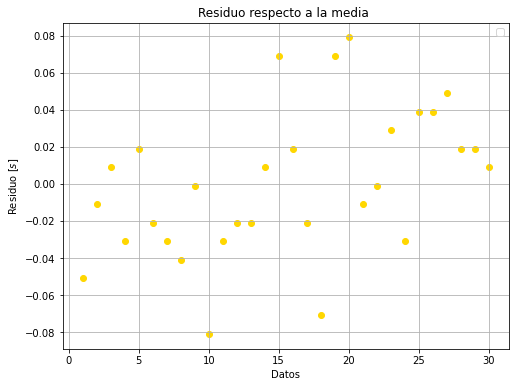

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x, dcaidamuscular-promediomuscular, color='pink')
plt.legend()
plt.title("Residuo respecto a la media menos el error muscular")
plt.xlabel('Datos')
plt.ylabel('Residuo [$s$]')
plt.grid()

plt.figure(figsize=(8,6))
plt.scatter(x, dcaida-promedio, color='gold')
plt.legend()
plt.title("Residuo respecto a la media ")
plt.xlabel('Datos')
plt.ylabel('Residuo [$s$]')
plt.grid()

Analizando las gráficas se puede observar que en ambas todos estos datos están distribuidos de manera aleatoria con respecto a la media ya que están distribuidos completamente al azar sin seguir algún patrón.

**Paso 3.** Utilizando g=2d/t^2 para determinar la aceleración de la gravedad para cada tiempo. Agrupe las aceleraciones en grupos de 5, 15 y 30 datosse raliza los siguientes pasos con cada grupo: (a) determinar la aceleración promedio y el error estándar, (b) En una misma figura graficar el valor promedio con barras de error de un error estándar, 3 errores estándar, y con la corrección de t-student para una incerteza del 0.27%. Se incluye en la gráfica como valor aceptado para la aceleración g=977 cm/s^2 y se analiza sobre el resultado para cada grupo y cada error reportado.

In [9]:
alpha = 1 - 0.27/100 # Incerteza para t-student
 
ts1n, ts1p = stats.t.interval(alpha,5-1) 
ts2n, ts2p = stats.t.interval(alpha,15-1) 
ts3n, ts3p = stats.t.interval(alpha,30-1)

In [10]:
g=(2*1)/(dcaida**2)#valor de la gravedad de los datos tomados a mano
promediog= np.mean(g)
print("La gravedad prmedio es: ", promediog)

gmuscular=(2*1)/(dcaidamuscular**2)#valor de la gravedad menos el error muscular de los datos tomados a mano
promediogmuscular= np.mean(gmuscular)
print("La gravedad prmedio restandole el error muscular es: ", promediogmuscular)

La gravedad prmedio es:  4.355103307037505
La gravedad prmedio restandole el error muscular es:  11.03618039893148


In [ ]:
#usando los valores de la gravedad menos el error muscular
#tomando los primeros 5 valores de g
g1_5 = gmuscular[0:5]
promediog1_5= np.mean(g1_5) # la aceleración promedio 
desviaciong1_5= np.std(g1_5) #desviacion estandar
errorg1_5= desviaciong1_5/(len(g1_5)**0.5) #el error estándar
#tomando los primeros 15 valores de g
g1_15 = gmuscular[0:15]
promediog1_15= np.mean(g1_15)# la aceleración promedio 
desviaciong1_15= np.std(g1_15)#desviacion estandar
errorg1_15= desviaciong1_15/(len(g1_15)**0.5)#el error estándar
#tomando todos los valores de g
g1_30 = gmuscular[0:30]
promediog1_30= np.mean(g1_30)# la aceleración promedio
desviaciong1_30= np.std(g1_30)#desviacion estandar
errorg1_30= desviaciong1_30/(len(g1_30)**0.5)#el error estándar
print('Para la muestra de 5 datos medidos, el valor promedio de la gravedad con su error estándar es: ' ,(promediog1_5,errorg1_5))
print('Para la muestra de 15 datos medidos, el valor promedio de la gravedad con su error estándar es: ' ,(promediog1_15,errorg1_15))
print('Para la muestra de 30 datos medidos, el valor promedio de la gravedad con su error estándar es: ' ,(promediog1_30,errorg1_30))

Para la muestra de 5 datos medidos, el valor promedio de la gravedad con su error estándar es:  (11.579081143092846, 0.6487720444002499)
Para la muestra de 15 datos medidos, el valor promedio de la gravedad con su error estándar es:  (11.814097084572909, 0.4791121337741357)
Para la muestra de 30 datos medidos, el valor promedio de la gravedad con su error estándar es:  (11.03618039893148, 0.37110065677872023)


In [ ]:
gcucuta= 9.790 #m/seg**2
#graficando
fig = plt.figure(figsize=(10,8)) # Gráfica.
plt.errorbar(4,promediog1_5,errorg1_5,color="gold", fmt='*',label='n = 5, e = sigma',capsize=5)
plt.errorbar(5,promediog1_5,3*errorg1_5,color="red", fmt='*',label='n = 5, e = 3*sigma',capsize=5)
plt.errorbar(6,promediog1_5,ts1p*errorg1_5,color="sienna", fmt='*',label='n = 5, e = t*sigma',capsize=5)
plt.errorbar(14,promediog1_15,errorg1_15,color="olive", fmt='*',label='n = 15, e = sigma',capsize=5)
plt.errorbar(15,promediog1_15,3*errorg1_15,color="aqua", fmt='*',label='n = 15, e = 3*sigma',capsize=5)
plt.errorbar(16,promediog1_15,ts2p*errorg1_15,color="#990033", fmt='*',label='n = 15, e = t*sigma',capsize=5)
plt.errorbar(29,promediog1_30,errorg1_30,color="khaki", fmt='*',label='n = 30, e = sigma',capsize=5)
plt.errorbar(30,promediog1_30,3*errorg1_30,color="paleturquoise", fmt='*',label='n = 30, e = 3*sigma',capsize=5)
plt.errorbar(31,promediog1_30,ts3p*errorg1_30,color="fuchsia", fmt='*',label='n = 30, e = t*sigma',capsize=5)
plt.hlines(gcucuta,1,44.3,linestyles='--',color='pink',label='Gravedad en Cucuta')
plt.title('Gravedad media al variar los números de datos ($n$) y error estandar ($e$).')
plt.ylabel('Gravedad [$ \dfrac{m}{s^2}]$')
plt.xlabel('Numero de datos')
plt.grid()
plt.legend(fontsize=12)

En la gráfica de arriba se puede observar que a medida de que la muestra aumenta el error disminuye ya que esta tiende a ser una distribución normal, al usar la corrección t-student determinado por α=1−0.27% y los grados de libertad dados por el tamaño n−1 donde n es el número de datos se da un intervalo qun mayor lo que hace que el el rango del error aumente por tanto hay mayor posibilidad de que el valor real se encuentra acotado por este.

**Paso 4.** Se determina el porcentaje de error del valor central para cada grupo con respecto al valor esperado para Cucuta.

In [ ]:
#error relativo
error1_5= abs(promediog1_5-gcucuta)
error1_15= abs(promediog1_15-gcucuta)
error1_30= abs(promediog1_30-gcucuta)
#porcentaje error relativo
perror1_5= (error1_5/gcucuta)*100
perror1_15= (error1_15/gcucuta)*100
perror1_30= (error1_30/gcucuta)*100
print("el procetnaje de error del valor central para un grupo de 5 datos es: ", perror1_5, "%")
print("el procetnaje de error del valor central para un grupo de 15 datos es: ", perror1_15, "%")
print("el procetnaje de error del valor central para un grupo de 30 datos es: ", perror1_30, "%")

De esta manera se puede concluir que esta forma de toma de datos es muy poco precisa puesto que es mayor al 10% sin embargo es de esperarse puesto que la reacción del ser humano es muy lenta.

5. Como exite un alto porcentaje de error, se ralizan los pasos 1,2,3,4 utilizando la aplicacion de trackerla cual funciona muy bien para analizar experimentos mecánicos.

In [ ]:
trackercaida= np.array([0.433, 0.500, 0.500, 0.500, 0.468, 0.467, 0.500, 0.468, 0.467, 0.467, 0.468, 0.467, 0.433, 0.467, 0.433, 0.500, 0.500, 0.433, 0.432, 0.433, 0.468, 0.467, 0.435, 0.435, 0.433, 0.435, 0.433, 0.468, 0.433, 0.467])

In [ ]:
x=np.arange(1,31,1)
len(x)
print(x)

In [ ]:
promediotracker= np.mean(trackercaida)#promedio de los tiempos obtenidos por medio de la herramienta tracker 
promediotracker

In [ ]:
#graficando los datos vs el residuo 
plt.figure(figsize=(8,6))
plt.scatter(x, trackercaida-promediotracker, color='paleturquoise')
plt.legend()
plt.title("Residuo respecto a la media tracker")
plt.xlabel('Datos')
plt.ylabel('Residuo')
plt.grid()



En la imagen de arriba se puede observar que esta herramienta es muy precisa y los valores son un poco estables, sin embargo sigue siendo una distribución normal.

In [ ]:
gtracker=(2*1)/(trackercaida**2)#valor de la gravedad de los datos tomados con tracker
print("la gravedad usando tracker es: ", gtracker)


In [ ]:

alpha = 1 - 0.27/100 # Incerteza para t-student
 
ts21n, ts21p = stats.t.interval(alpha,5-1) 
ts22n, ts22p = stats.t.interval(alpha,15-1) 
ts23n, ts23p = stats.t.interval(alpha,30-1)
#promedio de la gravedad de los datos usando tracker
promediogtracker= np.mean(gtracker)
print("la gravedad promedio usando tracker es: ", promediogtracker)

#usando los valores de la gravedad de tracker

#tomando los primeros 5 valores de g
g2_5 = gtracker[0:5]
promediog2_5= np.mean(g2_5) # la aceleración promedio 
desviaciong2_5= np.std(g2_5) #desviacion estandar
errorg2_5= desviaciong2_5/(len(g2_5)**0.5) #el error estándar

#tomando los primeros 15 valores de g
g2_15 = gtracker[0:15]
promediog2_15= np.mean(g2_15)# la aceleración promedio
desviaciong2_15= np.std(g2_15)#desviacion estandar
errorg2_15= desviaciong2_15/(len(g2_15)**0.5)#el error estándar

#tomando todos los valores de g
g2_30 = gtracker[0:30]
promediog2_30= np.mean(g2_30)# la aceleración promedio
desviaciong2_30= np.std(g2_30)#desviacion estandar
errorg2_30= desviaciong2_30/(len(g2_30)**0.5)#el error estándar
print('Para la muestra de 5 datos medidos con tracker , el valor promedio de la gravedad con su error estándar es: ' ,(promediog2_5,errorg2_5))
print('Para la muestra de 15 datos medidos con tracker, el valor promedio de la gravedad con su error estándar es: ' ,(promediog2_15,errorg2_15))
print('Para la muestra de 30 datos medidos con tracker, el valor promedio de la gravedad con su error estándar es: ' ,(promediog2_30,errorg2_30))
gcucuta= 9.790 #m/seg**2
#graficando
fig = plt.figure(figsize=(10,8)) # Gráfica.
plt.errorbar(4,promediog2_5,errorg2_5,color="gold", fmt='*',label='n = 5, e = sigma',capsize=5)
plt.errorbar(5,promediog2_5,3*errorg2_5,color="red", fmt='*',label='n = 5, e = 3*sigma',capsize=5)
plt.errorbar(6,promediog2_5,ts1p*errorg2_5,color="sienna", fmt='*',label='n = 5, e = t*sigma',capsize=5)
plt.errorbar(14,promediog2_15,errorg2_15,color="olive", fmt='*',label='n = 15, e = sigma',capsize=5)
plt.errorbar(15,promediog2_15,3*errorg2_15,color="aqua", fmt='*',label='n = 15, e = 3*sigma',capsize=5)
plt.errorbar(16,promediog2_15,ts2p*errorg2_15,color="#990033", fmt='*',label='n = 15, e = t*sigma',capsize=5)
plt.errorbar(29,promediog2_30,errorg2_30,color="khaki", fmt='*',label='n = 30, e = sigma',capsize=5)
plt.errorbar(30,promediog2_30,3*errorg2_30,color="paleturquoise", fmt='*',label='n = 30, e = 3*sigma',capsize=5)
plt.errorbar(31,promediog2_30,ts23p*errorg2_30,color="fuchsia", fmt='*',label='n = 30, e = t*sigma',capsize=5)
plt.hlines(gcucuta,1,44.3,linestyles='--',color='pink',label='Gravedad en Cucuta')
plt.title('Gravedad media usando tracker al variar los números de datos ($n$) y error estandar ($e$).')
plt.ylabel('Gravedad [$ \dfrac{m}{s^2}]$')
plt.xlabel('Numero de datos')

plt.grid()
plt.legend(fontsize=12)

A diferencia del punto 3 en esta gráfica los intervalos son un poco más pequeños.

In [ ]:
#error relativo
error2_5= abs(promediog2_5-gcucuta)
error2_15= abs(promediog2_15-gcucuta)
error2_30= abs(promediog2_30-gcucuta)
#porcentaje error relativo
perror2_5= (error2_5/gcucuta)*100
perror2_15= (error2_15/gcucuta)*100
perror2_30= (error2_30/gcucuta)*100
print("el procetnaje de error del valores central para un grupo de 5 datos es: ", perror2_5, "%")
print("el procetnaje de error del valores central para un grupo de 15 datos es: ", perror2_15, "%")
print("el procetnaje de error del valores central para un grupo de 30 datos es: ", perror2_30, "%")

Se puede ver que esta manera de realizar el experimento es mucho más precisa que haciendo la toma de datos a mano puesto que el valor de las incertidumbres son aceptables. 